In [2]:
#Implementing Neural Network
import torch
import torch.nn as nn

from torch import sigmoid



In [3]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)
        
    def forward(self,x):
        x=sigmoid(self.linear1(x))
        
        x=sigmoid(self.linear2(x))
        
        return x
                                    
       

In [4]:
model=torch.nn.Sequential(nn.Linear(1,2),nn.Sigmoid(),nn.Linear(2,1),nn.Sigmoid())

In [5]:
x=torch.tensor([[1.0]])

model(x)

In [6]:
yhat=model(x)

In [7]:
yhat

tensor([[0.3697]], grad_fn=<SigmoidBackward>)

In [8]:
#Train the model 

#create Data

X=torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor)
Y=torch.zeros(X.shape[0])
Y[(X[:,0]>-4)&(X[:,0]<4)]=1.0



In [9]:
X.shape[0]

40

In [10]:
Y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [11]:
#create training function

def train(Y,X,model,optimizer,criterion,epochs=1000):
    cost=[]
    total=0
    
    for epoch in range (epochs):
        total=0
        for y,x in zip(Y,X):
            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss
            total+=loss.item()
            cost.append(total)
    return cost

In [12]:
criterion=nn.BCELoss()

model=Net(1,2,1)

optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

cost=train(Y,X,model,optimizer,criterion,1000)

C:\Users\USER\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


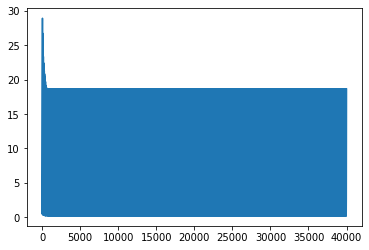

In [18]:
import matplotlib.pyplot as plt 
#cost.size()

m=torch.arange(0,40000,1)
plt.plot(m.numpy(),cost)
plt.show()

In [14]:
len(cost)

40000

In [15]:
#Multi Hidden Layer Neural Network 

import torch

import torch.nn as nn

from torch import sigmoid

from torch.utils.data import Dataset,DataLoader


In [23]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20,20,100).view(-1,1)
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)&(self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)&(self.x[:,0]<10)]=1
        
        self.y=self.y.view(-1,1)
        
        self.len=self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len
        

In [27]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)
        
    def forward(self,x):
        x=sigmoid(self.linear1(x))
        x=sigmoid(self.linear2(x))
        
        return x
        
        

In [30]:
def train(data_set,model,criterion,train_loader,optimizer,epochs=5,plot_number=10):
    cost=[]
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
            #PlotStuff(data_set.x,data_set.y,model)
        cost.append(total)
        
        return cost
    

In [31]:
criterion=nn.BCELoss()
data_set=Data()

train_loader=DataLoader(dataset=data_set,batch_size=100)

model=Net(1,6,1)

optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

train(data_set,model,criterion,train_loader,optimizer,epochs=1000)

[0.8785784840583801]